<h1> Decision Tree Classifier Algorithm </h1> 

In [33]:
from IPython.display import IFrame
from sklearn import datasets
from itertools import cycle
import matplotlib
import pylab as pl

In [34]:
IFrame('https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data',width=300, height=200)

<h2> Load Data Iris </h2>
<h5> Display the data part (description of the data in terms of attributes) and the target part (class, target, label) </h5>

In [35]:
irisData = datasets.load_iris()
data = irisData.data
target = irisData.target
print ("Data : ", data)
print ("Target : ", target)

Data :  [[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 4.5 1.5]
 [6.

<h2> Exploring the dataset </h2>

How are the data distributed in the tables?
How much data is there in each class?
What are the attributes and class of the 32nd element in the sample?

<h5> What are the attributes of the dataset? </h5>

In [36]:
irisData.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

<h5> What are the target classes or labels of the dataset? </h5>

In [37]:
target_names = irisData.target_names
irisData.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

<h5> What is the description of the dataset? </h5>

In [38]:
print(irisData.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

Thus, we have:
    <h5> Number of data in each class is 50 so in total 50 + 50 + 50 = 150 </h5>
    <h5> Missing Value: 0 </h5>

        
    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ====================


<h5> Note: </h5> The attributes and class of the 32nd element in the sample:

In [39]:
print("Attributes : ")
for i in range(0, len(irisData.feature_names)):
    print(irisData.feature_names[i], " : ", irisData.data[32][i])
print("class : ", irisData.target_names[irisData.target[32]])

Les attributs : 
sepal length (cm)  :  5.2
sepal width (cm)  :  4.1
petal length (cm)  :  1.5
petal width (cm)  :  0.1
classe :  setosa


In [40]:
def plot_2D(data, target, target_names):
    colors = cycle('rgbcmykw') # cycle de couleurs
    target_ids = range(len(target_names))
    pl.figure()
    for i, c, label in zip(target_ids, colors, target_names):
        print("Scatter plot : ", target_names[i])
        pl.scatter(data[target == i, 0], data[target == i, 1], c=c, label=label)
        pl.legend()
        pl.show()

Scatter plot :  setosa


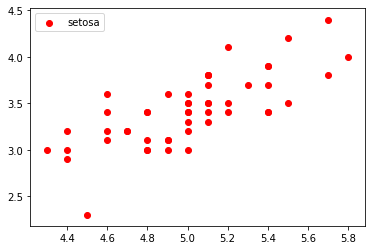

Scatter plot :  versicolor


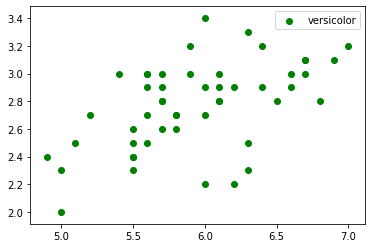

Scatter plot :  virginica


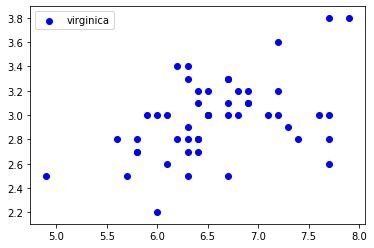

In [41]:
plot_2D(data, target, target_names)

<h5> Understand and comment: </h5>
The dataset is normally distributed for the most part, so we can use algorithms that assume that the data is normally distributed.

<h5>2.</h5>

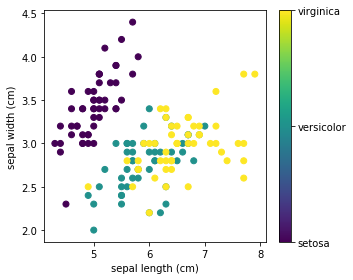

In [42]:
# The indices of the features that we are plotting
x_index = 0
y_index = 1

# this formatter will label the colorbar with the correct target names
formatter = pl.FuncFormatter(lambda i, *args: irisData.target_names[int(i)])

pl.figure(figsize=(5, 4))
pl.scatter(irisData.data[:, x_index], irisData.data[:, y_index], c=irisData.target)
pl.colorbar(ticks=[0, 1, 2], format=formatter)
pl.xlabel(irisData.feature_names[x_index])
pl.ylabel(irisData.feature_names[y_index])

pl.tight_layout()
pl.show()

<h2> First classifier training: </h2>

In [43]:
from sklearn.tree import DecisionTreeClassifier

In [44]:
dtc = DecisionTreeClassifier(random_state=0)
irisData = datasets.load_iris()
dtc.fit(irisData.data[:-1], irisData.target[:-1])
p31 = dtc.predict([irisData.data[31]])
print(p31)
plast = dtc.predict([irisData.data[-1]])
print(plast)
p = dtc.predict(irisData.data[:])
print(p)

[0]
[2]
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2]


In [45]:
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(irisData.data[:99], irisData.target[:99])
P = dtc.predict(irisData.data[100:149])

<h5> Result: </h5>
The program below uses the same dataset for training and testing.
The results do not appear to be consistent. This is a case of great learning! To balance the dataset, we can use several methods to divide the learning dataset from the test dataset:
 <h5> - Split test </h5>
 <h5> - Cross Valisation </h5>

<h2> Evaluate the performance of a classifier </h2>
The objective here is to initiate learning on the Iris dataset, and to assess the performance of this learning by calculating for each:
<h5> - The learning error </h5>
<h5> - Estimation of the real error by separating the training sample into 2 parts</h5>
<h5> - The estimation of the real error by cross validation.</h5>
<h5> 1. Performance on the learning set </h5>

In [46]:
ea = 0
#P tableau qui contient les prédictions
P = dtc.predict(irisData.data)
#Y tableau qui contient les cibles
Y = irisData.target
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        ea = ea+1
e1 = ea/len(irisData.data)
print("Erreur : ", e1)

Erreur :  0.3333333333333333


<h5> 2. </h5> The operators on arrays and matrices should make it possible to perform this computation in a single instruction

In [47]:
import numpy as np

In [48]:
x = np.array(P-Y)
e2 = np.count_nonzero(x)/len(irisData.data)
print("Erreur : ", e2)

Erreur :  0.3333333333333333


<h5>3.</h5> Taux d'erreur e = 1 - a

In [49]:
#Accuracy
a = dtc.score(data, target)
#Erreur
e3 = 1 - a
print("Erreur : ",e3)

Erreur :  0.33333333333333337


<h3> Result: </h3>
<h5> Calculated error: </h5>
        
    ============== ======== 
                    Erreur  
    ============== ======== 
    Method 1:      0.3333333333333333 
    Method 2:      0.3333333333333333  
    Method 3:      0.33333333333333337 
    ============== ======== 
The value found is the same!
 
<h5> Data with a prediction error: </h5>

In [50]:
print("Ligne  Enregistrement   Prédiction  ||  Observation ")
for i in range(len(irisData.data)):
    if (P[i] != Y[i]):
        print(i, " ", data[i] , "   " ,P[i] , "      || " , Y[i]) 

Ligne  Enregistrement   Prédiction  ||  Observation 
100   [6.3 3.3 6.  2.5]     1       ||  2
101   [5.8 2.7 5.1 1.9]     1       ||  2
102   [7.1 3.  5.9 2.1]     1       ||  2
103   [6.3 2.9 5.6 1.8]     1       ||  2
104   [6.5 3.  5.8 2.2]     1       ||  2
105   [7.6 3.  6.6 2.1]     1       ||  2
106   [4.9 2.5 4.5 1.7]     1       ||  2
107   [7.3 2.9 6.3 1.8]     1       ||  2
108   [6.7 2.5 5.8 1.8]     1       ||  2
109   [7.2 3.6 6.1 2.5]     1       ||  2
110   [6.5 3.2 5.1 2. ]     1       ||  2
111   [6.4 2.7 5.3 1.9]     1       ||  2
112   [6.8 3.  5.5 2.1]     1       ||  2
113   [5.7 2.5 5.  2. ]     1       ||  2
114   [5.8 2.8 5.1 2.4]     1       ||  2
115   [6.4 3.2 5.3 2.3]     1       ||  2
116   [6.5 3.  5.5 1.8]     1       ||  2
117   [7.7 3.8 6.7 2.2]     1       ||  2
118   [7.7 2.6 6.9 2.3]     1       ||  2
119   [6.  2.2 5.  1.5]     1       ||  2
120   [6.9 3.2 5.7 2.3]     1       ||  2
121   [5.6 2.8 4.9 2. ]     1       ||  2
122   [7.7 2.8 6.7 2. ]

<h5> 2. Performance in generalization </h5>
2.1. Estimate the actual error by dividing the training sample:

In [51]:
import random

In [52]:
def split(s):
    delim = int(len(s.data) / 3) * 2
    d = np.array(irisData.data)
    t = np.array(irisData.target)

    all = list(zip(d, t))
    random.shuffle(all)
    d, t = zip(*all)
    
    dataS1 = d[:delim]
    targetS1 = t[:delim]
    dataS2 = d[delim:]
    targetS2 = t[delim:]
    return [dataS1, targetS1, dataS2, targetS2]

In [53]:
[dataS1, targetS1, dataS2, targetS2] = split(irisData)

In [54]:
def test(s, clf):
    [dataS1, targetS1, dataS2, targetS2] = split(s)
    #Training s2
    clf.fit(dataS1, targetS1)
    #Predicted S2
    predictedS2 = clf.predict(dataS2)
    #Accuracy 
    accu = clf.score(dataS2,targetS2)  
    #Erreur
    e = 1 - accu
    return e

<h4> Test on the Iris dataset with DecisionTreeClassifier </h4>

In [55]:
test(irisData, dtc)

0.06000000000000005

In [56]:
test(irisData, dtc)

0.09999999999999998

<h5> Note: </h5> The estimated error is smaller than the apparent error previously calculated and we do not always get the same
estimate for actual error 

In [57]:
def t_test(s, clf, t):
    e_moyenne = 0
    for i in range(0, t):
        e_moyenne = e_moyenne + test(s, clf)
    e_moyenne = e_moyenne / t
    return e_moyenne

In [58]:
print("t = 10 : ", t_test(irisData, dtc, 10))
print("t = 50 : ", t_test(irisData, dtc, 50))
print("t = 100 : ", t_test(irisData, dtc, 100))
print("t = 500 : ", t_test(irisData, dtc, 500))
print("t = 1000 : ", t_test(irisData, dtc, 1000))

t = 10 :  0.05000000000000003
t = 50 :  0.058000000000000045
t = 100 :  0.05200000000000002
t = 500 :  0.05567999999999968
t = 1000 :  0.05578000000000004


In [59]:
def afficher_t(t):
    s = ""
    for element in t:
        s = s + " || " + str(element)
    return s

In [60]:
t_10 = ["t = 10"]
t_50 = ["t = 50"]
t_100 = ["t = 100"]
t_500 = ["t = 500"]
t_1000 = ["t = 1000"]

for i in range(0, 20):
    t_10.append(t_test(irisData, dtc, 10))
    t_50.append(t_test(irisData, dtc, 50))
    t_100.append(t_test(irisData, dtc, 100))
    t_500.append(t_test(irisData, dtc, 500))
    t_1000.append(t_test(irisData, dtc, 1000))
    

print(afficher_t(t_10))
print("---------------------------------------------------------------------")
print(afficher_t(t_50))
print("---------------------------------------------------------------------")
print(afficher_t(t_100))
print("---------------------------------------------------------------------")
print(afficher_t(t_500))
print("---------------------------------------------------------------------")
print(afficher_t(t_1000))

 || t = 10 || 0.05800000000000003 || 0.04600000000000003 || 0.05800000000000003 || 0.05600000000000001 || 0.06200000000000001 || 0.052000000000000005 || 0.054000000000000006 || 0.06599999999999999 || 0.052000000000000025 || 0.06600000000000002 || 0.07600000000000001 || 0.05400000000000001 || 0.04600000000000003 || 0.05800000000000001 || 0.06200000000000001 || 0.06000000000000003 || 0.04800000000000003 || 0.052000000000000025 || 0.04600000000000003 || 0.052000000000000025
---------------------------------------------------------------------
 || t = 50 || 0.051600000000000035 || 0.05600000000000003 || 0.060400000000000044 || 0.06000000000000003 || 0.05440000000000003 || 0.05120000000000004 || 0.05320000000000003 || 0.055200000000000034 || 0.05800000000000003 || 0.05000000000000004 || 0.05640000000000004 || 0.05600000000000004 || 0.05760000000000004 || 0.06720000000000004 || 0.056800000000000045 || 0.06400000000000004 || 0.06160000000000004 || 0.05320000000000004 || 0.06520000000000004 ||

<h5> Interpretation: </h5> Yes, indeed the error is stable, it is around 0.2
<h5> d. </h5> No, the estimated error (in its stable version), in the case of a test sample which only takes the 10th of the initial sample is not the same as with the proportion of 1/3. The error at the proportion of 1/3 is smaller.
<h5> e. </h5>

In [61]:
from sklearn.model_selection import train_test_split

In [62]:
def test_decoupage_sklearn(s, clf, size):
    (D_train,
     C_train,
     D_test,
     C_test) = train_test_split(s.data, s.target, test_size=size, random_state=1)
    clf.fit(D_train, D_test)
    #Predicted S2
    predictedS2 = clf.predict(C_train)
    #Accuracy 
    accu = clf.score(C_train,C_test)  
    #Erreur
    e = 1 - accu
    return e

In [63]:
print("Test_size = 0.2 : ", test_decoupage_sklearn(irisData, dtc, 0.2))
print("Test_size = 0.25 : ", test_decoupage_sklearn(irisData, dtc, 0.25))
print("Test_size = 0.3 : ", test_decoupage_sklearn(irisData, dtc, 0.3))
print("Test_size = 0.33 : ", test_decoupage_sklearn(irisData, dtc, 0.33))
print("Test_size = 0.35 : ", test_decoupage_sklearn(irisData, dtc, 0.35))

Test_size = 0.2 :  0.033333333333333326
Test_size = 0.25 :  0.02631578947368418
Test_size = 0.3 :  0.0444444444444444
Test_size = 0.33 :  0.040000000000000036
Test_size = 0.35 :  0.037735849056603765


<h5> 2.2 Estimate the real error by cross validation </h5>

In [64]:
from sklearn.model_selection import cross_val_score

In [65]:
def test_crossValidation(s,clf, k):
    scores = cross_val_score(clf, s.data, s.target, cv=k)
    acc = scores.mean()
    e = 1 - acc
    return e

In [66]:
print("k = 2 :", test_crossValidation(irisData, dtc, 2))
print("k = 3 :", test_crossValidation(irisData, dtc, 3))
print("k = 5 :", test_crossValidation(irisData, dtc, 5))
print("k = 8 :", test_crossValidation(irisData, dtc, 8))
print("k = 10 :", test_crossValidation(irisData, dtc, 10))

k = 2 : 0.046666666666666634
k = 3 : 0.033333333333333326
k = 5 : 0.039999999999999813
k = 8 : 0.03947368421052633
k = 10 : 0.040000000000000036
